# Lab | Final regression model in "Health Care for All" Case

At this point, we have created a model to predict who will make a donation and who won't. But, what about the ammount of money that each person will give? In this lab, subset those that made a donation and use that subset to create a model to predict how much money will they give.

Evaluate the result of your model and estimate how much better the result are for the bussiness in comparison with the naive scenario we discuss on Monday.

In [67]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [68]:
numerical = pd.read_csv(r'C:\Student\IRONHACK\Week7\D4_Cross_Validation_extended _Bootstrap_Bagging_Random_Forests\Labs\lab-random-forests\files_for_lab\numerical.csv')
numerical.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,...,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,...,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,...,14,2.0,16.0,5.0,12,7.481481,15078,1,4,60
3,0,70.000000,1,4,2,0,23,14,31,3,...,7,2.0,11.0,10.0,9,6.812500,172556,1,4,41
4,0,78.000000,3,2,60,1,28,9,53,26,...,8,3.0,15.0,15.0,14,6.864865,7112,1,2,26


In [69]:
target = pd.read_csv(r'C:\Student\IRONHACK\Week7\D4_Cross_Validation_extended _Bootstrap_Bagging_Random_Forests\Labs\lab-random-forests\files_for_lab\target.csv')
target.head()

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


In [70]:
categorical = pd.read_csv(r'C:\Student\IRONHACK\Week7\D4_Cross_Validation_extended _Bootstrap_Bagging_Random_Forests\Labs\lab-random-forests\files_for_lab\categorical.csv')
categorical.head()

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,...,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,...,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,...,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,...,28,1,87,11,94,11,95,12,87,2
4,FL,16,H,F,3,L,F,A,S,2,...,20,1,93,10,96,1,96,1,79,3


In [71]:
encoded_categorical = pd.get_dummies(categorical, drop_first=True)

In [72]:
data= pd.concat([numerical,encoded_categorical,target], axis=1)

In [73]:
data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [74]:
data = data[data['TARGET_B']==1]
data.dtypes

TCODE           int64
AGE           float64
INCOME          int64
WEALTH1         int64
HIT             int64
               ...   
DOMAIN_A_S      uint8
DOMAIN_A_T      uint8
DOMAIN_A_U      uint8
TARGET_B        int64
TARGET_D      float64
Length: 356, dtype: object

In [75]:
X = data.drop(columns =['TARGET_B','TARGET_D'])
y = data['TARGET_D']
X.shape
y.shape

(4843,)

In [76]:
from sklearn.feature_selection import RFE
from sklearn import linear_model
lm = linear_model.LinearRegression()
rfe = RFE(lm, n_features_to_select=50, verbose=False)
rfe.fit(X, y)


RFE(estimator=LinearRegression(), n_features_to_select=50, verbose=False)

In [77]:
df = pd.DataFrame(data = rfe.ranking_, columns=['Rank'])
df['Column_name'] = X.columns
top_features = df[df['Rank']==1]
top_features

,Rank,Column_name
21,1,ETH1
22,1,ETH2
25,1,ETH5
33,1,ETH13
34,1,ETH14
35,1,ETH15
36,1,ETH16
63,1,HHN2
64,1,HHN3
87,1,HU1


In [78]:
top_features = list(top_features['Column_name'])

In [79]:
donations_data_reduced = data[top_features]

<AxesSubplot:>

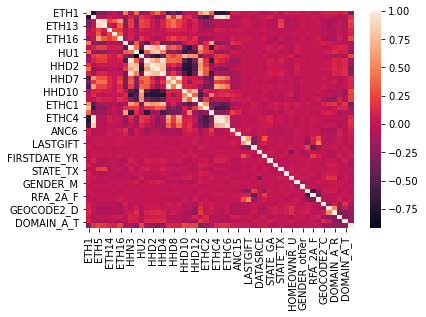

In [80]:
import seaborn as sns
sns.heatmap(donations_data_reduced.corr())

In [81]:
donations_data_reduced = donations_data_reduced.drop(['HU2','HHD2','ETH13','ETH15','HHD1','ETHC2','ETHC6'], axis = 1)

In [82]:
X=donations_data_reduced

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)

In [84]:
regr = DecisionTreeRegressor(criterion='mse',
                            splitter='best',
                            max_depth=11,
                            min_samples_split=20,
                            min_samples_leaf=20,)

model = regr.fit(X_train, y_train)

In [91]:
print("test data accuracy was: ",regr.score(X_test, y_test))
print("train data accuracy was: ",regr.score(X_train, y_train))

test data accuracy was:  0.2581492284511784
train data accuracy was:  0.6215887396969757


In [89]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(max_depth=12,
                             min_samples_split=5,
                             min_samples_leaf =5)
model = clf.fit(X_train, y_train)

In [90]:
print("test data accuracy was: ",clf.score(X_test, y_test))
print("train data accuracy was: ",clf.score(X_train, y_train))

test data accuracy was:  0.36734061670784557
train data accuracy was:  0.7502147958406772
